In [1]:
!pip install --upgrade pip
!pip install imutils
!python --v

  Using cached pip-24.0-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4
  Using cached imutils-0.5.4-py3-none-any.whl
unknown option --v
usage: python [option] ... [-c cmd | -m mod | file | -] [arg] ...
Try `python -h' for more information.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io, img_as_ubyte
from skimage.io import imread, imshow
from matplotlib.patches import Rectangle

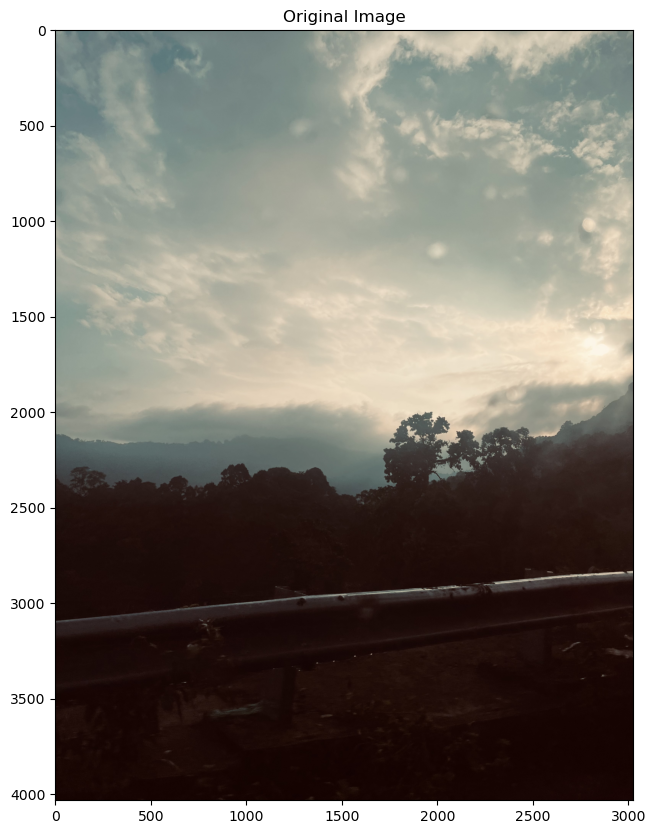

In [7]:
from skimage import io
import matplotlib.pyplot as plt

image = io.imread('test.jpg')
plt.figure(figsize=(10,10))
plt.title('Original Image')
plt.imshow(image)
plt.show()

In [8]:
def calc_color_overcast(image):
    # Calculate color overcast for each channel
    red_channel = image[:, :, 0]
    green_channel = image[:, :, 1]
    blue_channel = image[:, :, 2]

    # Create a dataframe to store the results
    channel_stats = pd.DataFrame(columns=['Mean', 'Std', 'Min', 'Median', 'P_80', 'P_90', 'P_99', 'Max'])

    # Compute and store the statistics for each color channel
    for channel, name in zip([red_channel, green_channel, blue_channel], ['Red', 'Green', 'Blue']):
        mean = np.mean(channel)
        std = np.std(channel)
        minimum = np.min(channel)
        median = np.median(channel)
        p_80 = np.percentile(channel, 80)
        p_90 = np.percentile(channel, 90)
        p_99 = np.percentile(channel, 99)
        maximum = np.max(channel)

        channel_stats.loc[name] = [mean, std, minimum, median, p_80, p_90, p_99, maximum]

    return channel_stats

In [9]:
calc_color_overcast(image)

,Mean,Std,Min,Median,P_80,P_90,P_99,Max
Red,107.407774,73.121400,8.0,118.0,180.0,207.0,242.0,255.0
Green,101.621733,79.651608,0.0,134.0,179.0,198.0,226.0,250.0
Blue,92.825920,73.388743,0.0,131.0,162.0,178.0,201.0,235.0


# White Patch Algorithm

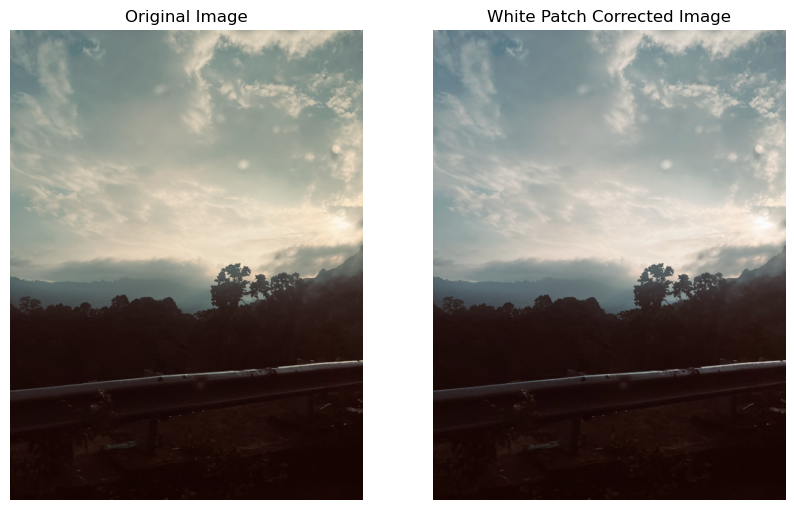

In [11]:
def white_patch(image, percentile=100):
   
    white_patch_image = img_as_ubyte(
        (image * 1.0 / np.percentile(image, 
                                     percentile, 
                                     axis=(0, 1))).clip(0, 1))
    # Plot the comparison between the original and white patch corrected images
    fig, ax = plt.subplots(1, 2, figsize=(10, 10))
    ax[0].imshow(image)
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    ax[1].imshow(white_patch_image, cmap='gray')
    ax[1].set_title('White Patch Corrected Image')
    ax[1].axis('off')

    plt.show()

# Read the input image
image = imread('test.jpg')

# Call the function to implement white patch algorithm
white_patch(image, 100)

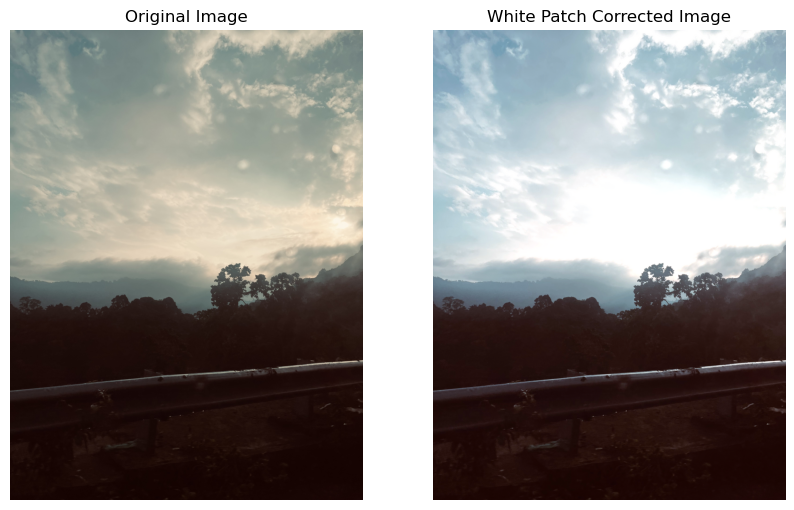

In [17]:
white_patch(image, 89)

# Gray-world Algorithm

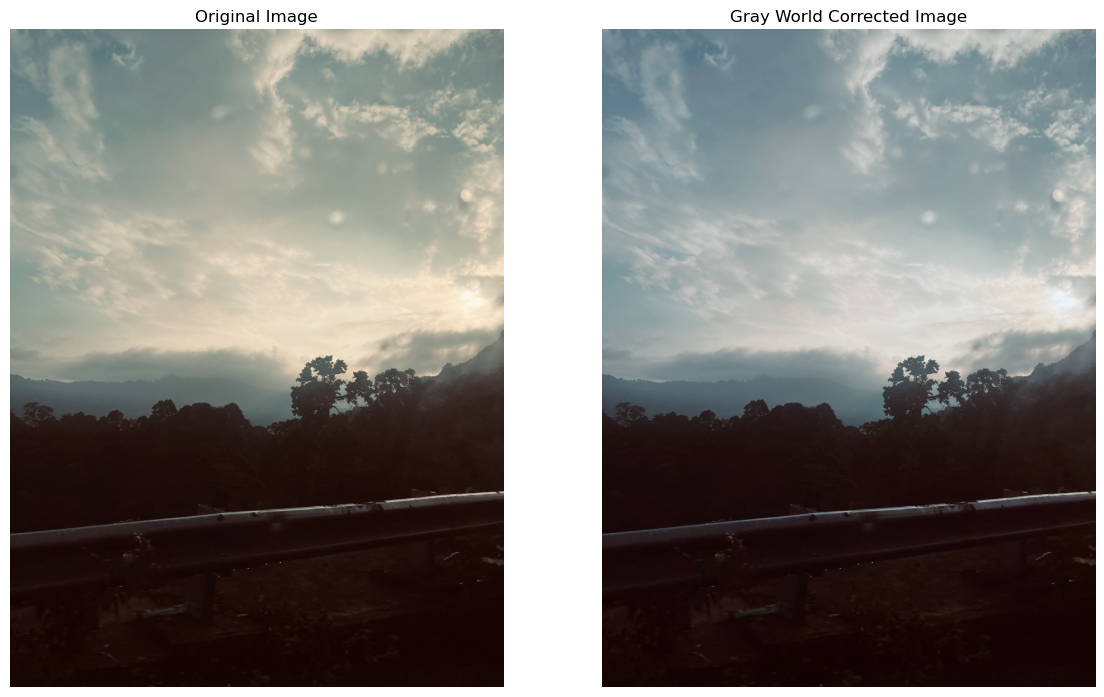

In [18]:
def gray_world(image):
    # Apply the Gray World algorithm
    image_grayworld = ((image * (image.mean() / image.mean(axis=(0, 1)))).clip(0, 255).astype(int))

    # Exclude alpha or opacity channel (transparency)
    if image.shape[2] == 4:
        image_grayworld[:, :, 3] = 255

    # Plot the comparison between the original and gray world corrected images
    fig, ax = plt.subplots(1, 2, figsize=(14, 10))
    ax[0].imshow(image)
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    ax[1].imshow(image_grayworld)
    ax[1].set_title('Gray World Corrected Image')
    ax[1].axis('off')

    plt.show()

# Call the function to apply the Gray World algorithm
gray_world(image)